This is my first homework assignment: obtaining, cleaning and visualizing three different sources of data

The proposed outline is as follows

1. Some excel (since apparently that's different enough) data from work about the alpine school district

    a. It is already pretty clean so I'll try answer a question such as "in what way do principals vary in certain measures"
    
2. Webscrape/API wikipedia for info on austronesian languages, speakers and countries

3. Some CSV from kaggle

# Part 1: School Data

In [1]:
##import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter ##done because I'll probably want to start counting some thing

In [2]:
principal_df = pd.read_excel("/Users/jacobbills/Desktop/Political Science/Research/Hallam/val ed/Val Ed Data for Analysis.xlsx",sheet_name="Stata") 
##uploading the sheet (already clean because for work)

I read the excel sheet into the into the program. I think everything worked right but I will check the first couple of lines to make sure. Since the data is already clean (I cleaned it for a different project for work) I will instead try to answer some questions, more specifically about the relationship between location (As determined by which high school the different schools feed into) and overall mean score

In [3]:
principal_df.head(5) ##checking and making sure that it read in right. It did

,School,Overall Mean Score,Core Components Mean Score,High Standards for Student Learning,Rigorous Curriculum,Quality Instruction,Culture of Learning & Professional Behavior,Connections to External Communities,Performance Accountability,Key Processes Mean Score,Planning,Implementing,Supporting,Advocating,Communicating,Monitoring,school type,Feeder cluster
0,Bonneville Elementary,3.839167,3.811667,3.74,3.69,4.04,4.08,3.55,3.77,3.866667,3.89,3.78,3.97,3.85,3.83,3.88,1,7
1,Cascade Elementary,3.949167,3.943333,3.86,3.67,4.11,4.19,3.88,3.95,3.955000,4.01,3.94,4.16,3.77,4.01,3.84,1,5
2,Cedar Ridge Elementary,3.647500,3.645000,3.60,3.60,3.74,3.73,3.47,3.73,3.650000,3.65,3.66,3.71,3.53,3.64,3.71,1,3
3,Cedar Valley Elementary,4.356667,4.356667,4.62,4.24,4.27,4.50,4.19,4.32,4.356667,4.38,4.54,4.38,4.15,4.46,4.23,1,8
4,Central Elementary,4.025000,4.016667,4.20,3.98,4.24,4.06,3.68,3.94,4.033333,4.01,3.99,4.18,3.88,4.03,4.11,1,6


In [4]:
print(principal_df.describe()) ##Shows the basic summary statistics for each variable
print(principal_df.columns[principal_df.isnull().any()]) ##checking for missing variab;es

       Overall Mean Score  Core Components Mean Score  \
count           60.000000                   60.000000   
mean             3.943581                    3.943000   
std              0.237557                    0.235962   
min              3.480000                    3.470000   
25%              3.763125                    3.769583   
50%              3.965833                    3.952500   
75%              4.108798                    4.109583   
max              4.460833                    4.456667   

       High Standards for Student Learning  Rigorous Curriculum  \
count                            60.000000            60.000000   
mean                              3.980500             3.880000   
std                               0.276163             0.243575   
min                               3.430000             3.380000   
25%                               3.797500             3.685000   
50%                               3.980000             3.910000   
75%              

In [5]:
principal_df.corr()
##Do a heat map here

,Overall Mean Score,Core Components Mean Score,High Standards for Student Learning,Rigorous Curriculum,Quality Instruction,Culture of Learning & Professional Behavior,Connections to External Communities,Performance Accountability,Key Processes Mean Score,Planning,Implementing,Supporting,Advocating,Communicating,Monitoring,school type,Feeder cluster
Overall Mean Score,1.000000,0.999028,0.937351,0.923266,0.949805,0.941346,0.855109,0.927856,0.999046,0.958356,0.969947,0.962042,0.946560,0.974987,0.936961,-0.233626,0.134710
Core Components Mean Score,0.999028,1.000000,0.933061,0.924454,0.947621,0.940509,0.862660,0.931799,0.996152,0.953895,0.969400,0.961320,0.945298,0.971328,0.930881,-0.235359,0.125853
High Standards for Student Learning,0.937351,0.933061,1.000000,0.863529,0.858364,0.862959,0.725349,0.846755,0.939824,0.919741,0.927361,0.900320,0.874066,0.918096,0.866598,-0.156468,0.161705
Rigorous Curriculum,0.923266,0.924454,0.863529,1.000000,0.842810,0.823848,0.733159,0.861014,0.920338,0.863385,0.867530,0.888640,0.889733,0.907385,0.881580,-0.343544,0.054904
Quality Instruction,0.949805,0.947621,0.858364,0.842810,1.000000,0.882966,0.801009,0.876086,0.950076,0.920962,0.901342,0.931132,0.885595,0.915686,0.915269,-0.255134,0.162049
Culture of Learning & Professional Behavior,0.941346,0.940509,0.862959,0.823848,0.882966,1.000000,0.801351,0.839506,0.940443,0.884109,0.924932,0.911125,0.922039,0.905565,0.864040,-0.108592,0.118119
Connections to External Communities,0.855109,0.862660,0.725349,0.733159,0.801009,0.801351,1.000000,0.729246,0.845886,0.773015,0.845004,0.826251,0.835145,0.832155,0.754279,-0.161684,0.018016
Performance Accountability,0.927856,0.931799,0.846755,0.861014,0.876086,0.839506,0.729246,1.000000,0.922230,0.919064,0.899756,0.871859,0.834388,0.901610,0.878516,-0.287744,0.174793
Key Processes Mean Score,0.999046,0.996152,0.939824,0.920338,0.950076,0.940443,0.845886,0.922230,1.000000,0.960882,0.968633,0.960920,0.945964,0.976770,0.941249,-0.231445,0.143191
Planning,0.958356,0.953895,0.919741,0.863385,0.920962,0.884109,0.773015,0.919064,0.960882,1.000000,0.931287,0.912788,0.869766,0.932951,0.881607,-0.246280,0.185705


In [13]:
"""
Since the school type and feeder cluster variables are actually not numeric, 
lets get an idea of how many categories there are for each
"""
fc = principal_df['Feeder cluster']
oms = principal_df['Overall Mean Score']
ccms = principal_df['Core Components Mean Score']
print(principal_df['school type'].unique())
print(fc.unique())
dummies = pd.get_dummies(fc) ##getting some dummies for OLS later


[1 2 3]
[7 5 3 8 6 4 1 2]


We can see here that there are three types of schools (elementary, middle and high school) and 8 different localities that there are located in.

In [7]:
feeder_counts = fc.value_counts()
feeder_counts

8    11
6     8
2     8
7     7
4     7
1     7
5     6
3     6
Name: Feeder cluster, dtype: int64

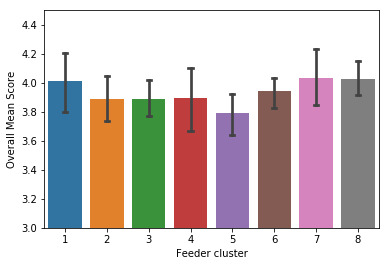

In [28]:
oms_fc = principal_df.groupby(['Feeder cluster'])['Overall Mean Score'].mean()
def barcap(x,y):
    sns.barplot(x, y, capsize=.1)
def goody():
    plt.ylim(3.0,4.5)
def bar1(x,y):
    barcap(x,y)
    goody()
bar1(fc,oms)

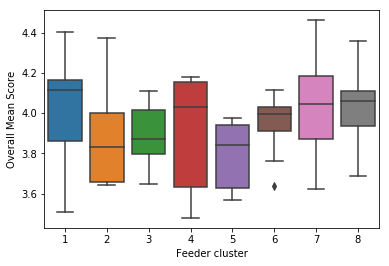

In [29]:
def boxcat(x,y):
    sns.boxplot(x,y)
boxcat(fc, oms)##check for outliers

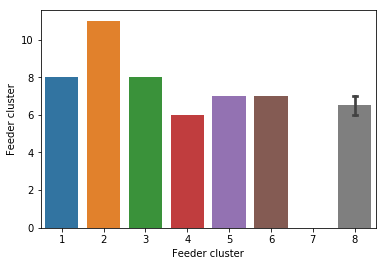

In [17]:
barcap(fc, feeder_counts)

# Part 2: Wikipedia
The first step is getting the Wikipedia API (which doesn't come with anaconda so I had to get it elsewhere), and then importing it

In [8]:
import wikipedia ##getting the Wikipedia API
from bs4 import BeautifulSoup ##to do webscraping
import requests ##to create a text file from the page I want
import time ##to not be too terrible of a person while scraping
import re # regex later on

Let's see if that worked right. It did! I then started messing around with the wikipedia API and realized that it would be too difficult the question that I wanted to answer. So instead I looked up how to scrape a table from wikipedia and then tried to do that, as detailed below.

In [202]:
url = "https://en.wikipedia.org/wiki/Austronesian_languages#Comparison_chart"
table_url = requests.get(url).text
##this should create text file that I can read into beautiful soup file
soup = BeautifulSoup(table_url, 'lxml')
print(soup.prettify()) ##viewing the the whole webpage in html :/

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Austronesian languages - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Austronesian_languages","wgTitle":"Austronesian languages","wgCurRevisionId":857222740,"wgRevisionId":857222740,"wgArticleId":58800,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with broken links to citations","All articles with unsourced statements","Articles with unsourced statements from May 2017","CS1 maint: Uses authors parameter","CS1 maint: Uses editors parameter","Webarchive template wayback links","All articles with dead extern

The next thing to do is extract the table with **soup.find**. I inspected the page to find what I wanted and then put it in.

In [395]:
num_tab = soup.findAll('table',{'class':'wikitable'})[1]
"""
By using findAll it looks through all the tables with that class, instead of just scraping the first table. The 
"""
num_tab

<table class="wikitable">
<tbody><tr>
<th style="background:#efefef;">English
</th>
<th style="background:#efefef;">one
</th>
<th style="background:#efefef;">two
</th>
<th style="background:#efefef;">three
</th>
<th style="background:#efefef;">four
</th>
<th style="background:#efefef;">person
</th>
<th style="background:#efefef;">house
</th>
<th style="background:#efefef;">dog
</th>
<th style="background:#efefef;">road
</th>
<th style="background:#efefef;">day
</th>
<th style="background:#efefef;">new
</th>
<th style="background:#efefef;">we
</th>
<th style="background:#efefef;">what
</th>
<th style="background:#efefef;">fire
</th></tr>
<tr>
<th><a href="/wiki/Proto-Austronesian_language" title="Proto-Austronesian language">Proto-Austronesian</a>
</th>
<td>*əsa, *isa
</td>
<td>*duSa
</td>
<td>*təlu
</td>
<td>*əpat
</td>
<td>*Cau
</td>
<td>*balay, *Rumaq
</td>
<td>*asu
</td>
<td>*zalan
</td>
<td>*qaləjaw, *waRi
</td>
<td>*baqəRu
</td>
<td>*kita, *kami
</td>
<td>*anu, *apa
</td>
<td>*Sap

It successfully pulled out the table I wanted! Now the next task is to make the table into something more readable and put into into a pandas dataframe. I used the html_table_extractor library which makes this easier and then followed some online instructions for how to actually pull out the table. This creates a series of lists which if I put directly into pandas makes a data frame with only a single column and each list as a row. So I had to write a for loop that would divide up each observation. Unfortunately this is now in the form where each observation (language) is a column and each variable (word) is a row, so I need to reshape the data. The different values are also dirty so I need to somehow remove the **\n** and ***** 

In [11]:
from html_table_extractor.extractor import Extractor

In [396]:
extractor = Extractor(str(num_tab))
extractor.parse()
lang = extractor.return_list()


In [397]:
df = pd.DataFrame()

row_c = 0
for x in lang:
    df[lang[row_c][0]] = [x.strip() for x in lang[row_c][1:]]
    row_c +=1
df = df.set_index('English\n')
df = df.transpose()    

English,one,two,three,four,person,house,dog,road,day,new,we,what,fire
Proto-Austronesian\n,"*əsa, *isa",*duSa,*təlu,*əpat,*Cau,"*balay, *Rumaq",*asu,*zalan,"*qaləjaw, *waRi",*baqəRu,"*kita, *kami","*anu, *apa",*Sapuy
Tetum\n,ida,rua,tolu,haat,ema,uma,asu,dalan,loron,foun,ita,saida,ahi
Amis\n,cecay,tosa,tolo,sepat,tamdaw,luma,wacu,lalan,cidal,faroh,kita,uman,namal
Puyuma\n,sa,dua,telu,pat,taw,rumah,soan,dalan,wari,vekar,mi,amanai,"apue,asi"
Tagalog\n,isa,dalawa,tatlo,apat,tao,bahay,aso,daan,araw,bago,tayo / kami,ano,apoy
Bikol\n,sarô,duwá,tuló,apat,táwo,harong,áyam,dálan,aldaw,bâgo,kitá,anó,kalayó
Rinconada Bikol\n,əsad,darwā,tolō,əpat,tawō,baləy,ayam,raran,aldəw,bāgo,kitā,onō,kalayō
Waray\n,usa,duha,tulo,upat,tawo,balay,"ayam,ido",dalan,adlaw,bag-o,kita,anu,kalayo
Cebuano\n,"usa,isa",duha,tulo,upat,tawo,balay,iro,dalan,adlaw,bag-o,kita,unsa,kalayo
Hiligaynon\n,isa,duha,tatlo,apat,tawo,balay,ido,dalan,adlaw,bag-o,kita,ano,kalayo


In [345]:
rumah_count = 0
balai_count = 0
other_house = 0
if df['house']:
    

In [348]:
df['house']

Proto-Austronesian\n                       *balay, *Rumaq
Tetum\n                                               uma
Amis\n                                               luma
Puyuma\n                                            rumah
Tagalog\n                                           bahay
Bikol\n                                            harong
Rinconada Bikol\n                                   baləy
Waray\n                                             balay
Cebuano\n                                           balay
Hiligaynon\n                                        balay
Aklanon\n                                           baeay
Kinaray-a\n                                         balay
Tausug\n                                              bay
Maranao\n                                           walay
Kapampangan\n                                        bale
Pangasinan\n                                        abong
Ilokano\n                                           balay
Ivatan\n      

# Part 3: CSV 

I got a CSV from the Minorities at Risk (MAR) database. I have never seen it before so we get to learn to together what it is like. 

In [33]:
mar_df = pd.read_csv("marupdate_20042006.csv")

In [34]:
mar_df.head()

,numcode,VMAR_Group,ccode,country,VMAR_Region,year,GPOP,CPOP,GPRO,LANG,...,CCGROUPSEV1,CCGROUP2,CCGROUPSEV2,CCGROUP3,CCGROUPSEV3,PROT,REB,REPGENCIV,REPNVIOL,REPVIOL
0,201,African-Americans,2,United States of America,Western Democracies and Japan,2004,37771928,292805643,0.129,0,...,1,-99,0,-99,0,3,0,0,0,0
1,201,African-Americans,2,United States of America,Western Democracies and Japan,2005,38130263,295583436,0.129,0,...,3,-99,0,-99,0,4,0,0,0,0
2,201,African-Americans,2,United States of America,Western Democracies and Japan,2006,38499072,298442420,0.129,0,...,3,-99,0,-99,0,3,0,0,0,0
3,202,Hispanics,2,United States of America,Western Democracies and Japan,2004,43920846,292805643,0.150,1,...,3,Blacks,3,-99,0,3,0,0,0,0
4,202,Hispanics,2,United States of America,Western Democracies and Japan,2005,44337515,295583436,0.150,1,...,3,Blacks,3,-99,0,5,0,0,0,0
